In [1]:
import os
import sys
import random
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

from design_gene_blocks import DesignEblocks


# # For plasmid viewing
# import biotite.sequence as seq
# import biotite.sequence.io.genbank as gb
# import biotite.sequence.graphics as graphics
# import biotite.database.entrez as entrez
# from biotite.sequence import Feature, Location, Annotation

# !pip3 install openpyxl

# from eblocks import Mutation, Eblocks, EblockDesign, Sequence
from mutation import Mutation
from sequence import Plasmid
from eblocks import Eblocks, EblockDesign
from primer import DesignPrimers
from plot import Plot

%load_ext autoreload
%autoreload 2

# !pip install dna_features_viewer

In [2]:
mutation_instance = Mutation()
fp = r"C:\Users\Rosan\Documents\git\my_repositories\design_gene_blocks\tutorial\output\mutations_random_Msmeg_DnaE1_N27_2023-12-05.txt"
result = mutation_instance.parse_mutations(fp)
print(len(mutation_instance.mutations))

sequence_instance = Plasmid()
sequence_instance.parse_sequence(r"C:\Users\Rosan\Documents\git\my_repositories\design_gene_blocks\tutorial\files\A0QX55.fasta")
sequence_instance.parse_vector(r"C:\Users\Rosan\Documents\git\my_repositories\design_gene_blocks\tests\files\snapgene_vector_valid_1.dna")
print(sequence_instance.sequence)
print(sequence_instance.seqid)

27
atgagcggttcatctgcggggtcctccttcgtgcacctgcacaaccacaccgagtattcgatgctggacggtgccgcgaagatcacgcccatgctcgccgaggtggagcggctggggatgcccgcggtggggatgaccgaccacggaaacatgttcggtgccagcgagttctacaactccgcgaccaaggccgggatcaagccgatcatcggcgtggaggcatacatcgcgccgggctcgcggttcgacacccggcgcatcctgtggggtgaccccagccaaaaggccgacgacgtctccggcagcggctcctacacgcacctgacgatgatggccgagaacgccaccggtctgcgcaacctgttcaagctgtcctcgcatgcttccttcgagggccagctgagcaagtggtcgcgcatggacgccgagctcatcgccgaacacgccgagggcatcatcatcaccaccggatgcccgtcgggggaggtgcagacccgcctgcggctcggccaggatcgggaggcgctcgaagccgcggcgaagtggcgggagatcgtcggaccggacaactacttccttgagctgatggaccacgggctgaccatcgaacgccgggtccgtgacggtctgctcgagatcggacgcgcgctcaacattccgcctcttgccaccaatgactgccactacgtgacccgcgacgccgcccacaaccatgaggctttgttgtgtgtgcagaccggcaagaccctctcggatccgaatcgcttcaagttcgacggtgacggctactacctgaagtcggccgccgagatgcgccagatctgggacgacgaagtgccgggcgcgtgtgactccaccttgttgatcgccgaacgggtgcagtcctacgccgacgtgtggacaccgcgcgaccggatgcccgtgtttccggtgcccgatgggcatgaccaggcgtcctggctgcgtcacgaggtggacgccgggcttcgccggcgat

In [3]:
eblocks_instance = Eblocks()
design_instance = EblockDesign(eblocks_instance=eblocks_instance,
                               mutation_instance=mutation_instance,
                               sequence_instance=sequence_instance,)

design_instance.run_design_eblocks()

# TODO Remove print statements (add verbose option to functions)

Optimizing based on price per bp ...
Lowest cost: 2067.15 with cluster {2: [1401, 1773, 1425, 1374, 1272, 1368, 1977, 1719, 2172], 0: [2424, 2508, 3264, 2790, 3366, 2670, 2607, 3456, 2283, 2286, 2319, 2361, 2349, 2667, 2670, 2673, 2676, 2679, 2682, 2685], 1: [834, 504, 552, 852, 516, 561, 666, 636, 261, 327, 351, 672, 675]}
Finished.


In [4]:
plot_instance = Plot(mutation_instance=mutation_instance,
                     eblocks_design_instance=design_instance,
                     sequence_instance=sequence_instance,
                     output_dir=r"C:\Users\Rosan\Documents\git\my_repositories\design_gene_blocks\tutorial\output")

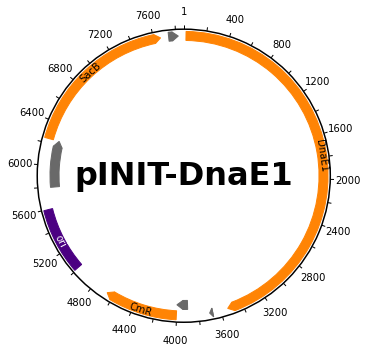

(<PolarAxesSubplot:>, <Figure size 720x360 with 1 Axes>)

In [5]:
plot_instance.show = True

plot_instance.plot_vector(figsize=(10, 5))

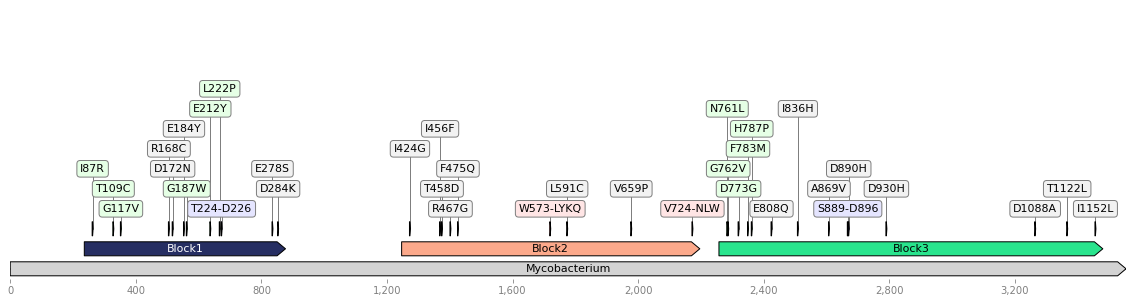

In [6]:
plot_instance.plot_eblocks_mutations(figure_length=20,
                                     figure_width=5)

# TODO Be consistent with the figuresieze and figsize figure length, figure width as input arguments

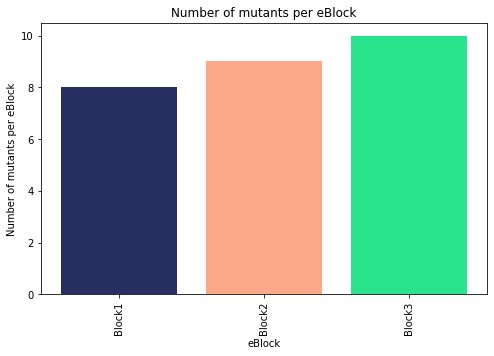

In [7]:
plot_instance.plot_histogram_mutations()

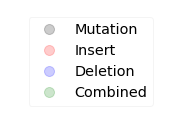

In [8]:
plot_instance.plot_mutation_legend()

In [9]:
for k, v in design_instance.eblocks.items():
    print(k, v)
    print(k)

<mutation.Mutation object at 0x0000026FFF7137B8> ['Block_1_pos_236_877', 'ctcgcggttcgacacccggcgccgtctgtggggtgaccccagccaaaaggccgacgacgtctccggcagcggctcctacacgcacctgtgcatgatggccgagaacgccaccgtgctgcgcaacctgttcaagctgtcctcgcatgcttccttcgagggccagctgagcaagtggtcgcgcatggacgccgagctcatcgccgaacacgccgagggcatcatcatcaccaccggatgcccgtcgggggaggtgcagacccgcctgcggctcggccaggatcgggaggcgctcgaagccgcggcgaagtggcgggagatcgtcggaccggacaactacttccttgagctgatggaccacgggctgaccatcgaacgccgggtccgtgacggtctgctcgagatcggacgcgcgctcaacattccgcctcttgccaccaatgactgccactacgtgacccgcgacgccgcccacaaccatgaggctttgttgtgtgtgcagaccggcaagaccctctcggatccgaatcgcttcaagttcgacggtgacggctactacctgaagtcggccgccgagatgcgccagatctgggacgacgaagtgccgggcgcgtgtgactccaccttgttgatcgccgaacggg', 115, 'gtg']
<mutation.Mutation object at 0x0000026FFF700DD8> ['Block_1_pos_236_877', 'ctcgcggttcgacacccggcgcatcctgtggggtgaccccagccaaaaggccgacgacgtctccggcagcggctcctacacgcacctgacgatgatggccgagaacgccaccggtctgcgcaacctgttcaagctgtcctcgcatgcttccttcgagggccagctgagcaagtggtcgcgcatggacgccgagctc

In [10]:
# Now design primers

primers_instance = DesignPrimers(mutation_instance=mutation_instance,
                                 eblock_instance=eblocks_instance,
                                 eblocks_design_instance=design_instance,
                                 sequence_instance=sequence_instance, 
                                 output_dir=r"C:\Users\Rosan\Documents\git\my_repositories\design_gene_blocks\tutorial\output")

primers_instance.run_IVAprimer()

Complementarity between the IVA primers for Block_2_pos_1247_2197 exceeds threshold of 4


,Eblock,fw_sequence,rv_sequence,FW Overhang,FW Template,RV Overhang,RV Template,Tm FW Template,Tm Rv Template,Tm FW Overhang,Tm RV Overhang,end position,begin position,FW Primer (5>3),RV Primer (5>3),Max hairpin length,Max complementary length
0,Block_1_pos_236_877,atgagcggttcatctgcggggtcctccttcgtgcacctgcacaacc...,tactcgccaagtagacgccccaggaggaagcacgtggacgtgttgg...,gatcgccgaacggg,tgcagtcctacgccgacgtg,gagcgccaagctgtg,ctccgtatgtagcgcggccc,59.16,59.71,48.02,49.71,877,236,gatcgccgaacgggtgcagtcctacgccgacgtg,gagcgccaagctgtgctccgtatgtagcgcggccc,4.0,4.0
1,Block_2_pos_1247_2197,atgagcggttcatctgcggggtcctccttcgtgcacctgcacaacc...,tactcgccaagtagacgccccaggaggaagcacgtggacgtgttgg...,gcccgcgccg,acattctacgcaaggccatgggc,gtggagctacgggct,ccaaggagttggggctcgc,59.81,57.48,46.18,48.80,2197,1247,gcccgcgccgacattctacgcaaggccatgggc,gtggagctacgggctccaaggagttggggctcgc,6.0,5.0
2,Block_3_pos_2258_3481,atgagcggttcatctgcggggtcctccttcgtgcacctgcacaacc...,tactcgccaagtagacgccccaggaggaagcacgtggacgtgttgg...,ggcacttgatcagtcgt,tgcgggtgacgccgtc,gaagaggctaccgtacg,cacgacctcttcctcaagctccc,57.09,58.72,48.41,48.13,3481,2258,ggcacttgatcagtcgttgcgggtgacgccgtc,gaagaggctaccgtacgcacgacctcttcctcaagctccc,7.0,4.0


In [11]:
for k, v in design_instance.eblocks.items():
    print(k, v)

<mutation.Mutation object at 0x0000026FFF7137B8> ['Block_1_pos_236_877', 'ctcgcggttcgacacccggcgccgtctgtggggtgaccccagccaaaaggccgacgacgtctccggcagcggctcctacacgcacctgtgcatgatggccgagaacgccaccgtgctgcgcaacctgttcaagctgtcctcgcatgcttccttcgagggccagctgagcaagtggtcgcgcatggacgccgagctcatcgccgaacacgccgagggcatcatcatcaccaccggatgcccgtcgggggaggtgcagacccgcctgcggctcggccaggatcgggaggcgctcgaagccgcggcgaagtggcgggagatcgtcggaccggacaactacttccttgagctgatggaccacgggctgaccatcgaacgccgggtccgtgacggtctgctcgagatcggacgcgcgctcaacattccgcctcttgccaccaatgactgccactacgtgacccgcgacgccgcccacaaccatgaggctttgttgtgtgtgcagaccggcaagaccctctcggatccgaatcgcttcaagttcgacggtgacggctactacctgaagtcggccgccgagatgcgccagatctgggacgacgaagtgccgggcgcgtgtgactccaccttgttgatcgccgaacggg', 115, 'gtg']
<mutation.Mutation object at 0x0000026FFF700DD8> ['Block_1_pos_236_877', 'ctcgcggttcgacacccggcgcatcctgtggggtgaccccagccaaaaggccgacgacgtctccggcagcggctcctacacgcacctgacgatgatggccgagaacgccaccggtctgcgcaacctgttcaagctgtcctcgcatgcttccttcgagggccagctgagcaagtggtcgcgcatggacgccgagctc

In [12]:
sequence_instance.sequence[22:44]

Seq('cctccttcgtgcacctgcacaa')

In [13]:
primers_instance.run_SEQprimer()

236 877 2
320
primer_start_index 136
closest distance None
closest distance None
1247 2197 2
475
primer_start_index 1147
closest distance None
closest distance None
2258 3481 3
407
primer_start_index 2158
closest distance None
closest distance None
closest distance None


In [14]:
from Bio.SeqUtils import MeltingTemp as mt, GC

result = {}
for i in range(len(sequence_instance.sequence)):
    for j in range(i, len(sequence_instance.sequence)):
        option = sequence_instance.sequence[i:j]
        if 18 <= len(option) <= 24:
            gc_content = GC(option)
            if 45 <= gc_content <= 55:
                result[(i, j)] = option
for k, v in result.items():
    print(k, v)

(24, 44) tccttcgtgcacctgcacaa
(27, 47) ttcgtgcacctgcacaacca
(27, 49) ttcgtgcacctgcacaaccaca
(33, 57) cacctgcacaaccacaccgagtat
(34, 56) acctgcacaaccacaccgagta
(34, 57) acctgcacaaccacaccgagtat
(34, 58) acctgcacaaccacaccgagtatt
(35, 57) cctgcacaaccacaccgagtat
(35, 58) cctgcacaaccacaccgagtatt
(35, 59) cctgcacaaccacaccgagtattc
(36, 56) ctgcacaaccacaccgagta
(36, 57) ctgcacaaccacaccgagtat
(36, 58) ctgcacaaccacaccgagtatt
(36, 59) ctgcacaaccacaccgagtattc
(36, 60) ctgcacaaccacaccgagtattcg
(37, 56) tgcacaaccacaccgagta
(37, 57) tgcacaaccacaccgagtat
(37, 58) tgcacaaccacaccgagtatt
(37, 59) tgcacaaccacaccgagtattc
(37, 60) tgcacaaccacaccgagtattcg
(37, 61) tgcacaaccacaccgagtattcga
(38, 57) gcacaaccacaccgagtat
(38, 58) gcacaaccacaccgagtatt
(38, 59) gcacaaccacaccgagtattc
(38, 60) gcacaaccacaccgagtattcg
(38, 61) gcacaaccacaccgagtattcga
(38, 62) gcacaaccacaccgagtattcgat
(39, 57) cacaaccacaccgagtat
(39, 58) cacaaccacaccgagtatt
(39, 59) cacaaccacaccgagtattc
(39, 60) cacaaccacaccgagtattcg
(39, 61) cacaaccacac